In [2]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # ✅ should be pyplot, not matplotlib
import seaborn as sns
from collections import Counter

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # ✅ typo fixed

# Visualization
import plotly.express as px  # ✅ no space before .express
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # ✅ capitalized correctly
import missingno  # ✅ alias is useful

# NLP preprocessing
import re
import nltk
from nltk import ngrams
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.tokenize import word_tokenize

# Downloading necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Statistics
from scipy import stats

import string

# Scikit-learn preprocessing & modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kirsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kirsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("C:/Users/kirsh/OneDrive/Desktop/sql and python/fake_job_postings.csv", engine='python', encoding="utf-8")

In [5]:
data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.shape

(17880, 18)

In [7]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:
def missing_data(data):
    absolute_missing = data.isnull().sum().sort_values(ascending = False)
    percentage_missing = np.round((data.isnull().sum() / data.shape[0] * 100),2).sort_values(ascending = False)
    missing_dataframe = pd.concat([absolute_missing,percentage_missing],axis = 1,keys = ['Total Count','Percentage'])
    return missing_dataframe[missing_dataframe['Total Count'] > 0]

In [10]:
missing_data(data)

,Total Count,Percentage
salary_range,15012,83.96
department,11547,64.58
required_education,8105,45.33
benefits,7212,40.34
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2696,15.08


In [11]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [13]:
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [14]:
data['fraudulent'].value_counts(normalize=True)

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

<Axes: xlabel='fraudulent', ylabel='count'>

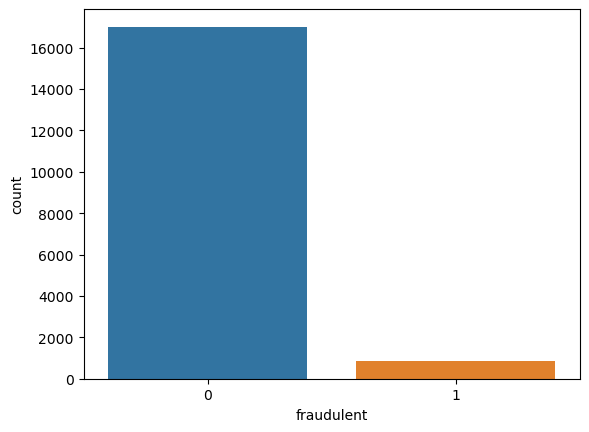

In [15]:
sns.countplot(x= data['fraudulent'])

In [16]:
data.duplicated().sum()

0

In [17]:
data['location'].value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3105, dtype: int64

In [18]:
data['salary_range'].value_counts()

salary_range
0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: count, Length: 874, dtype: int64

In [19]:
data['salary_range'].nunique()

874

In [20]:
data['department'].value_counts()

department
Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: count, Length: 1337, dtype: int64

In [21]:
data['title'].value_counts()

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

In [22]:
data['has_company_logo'].value_counts()

has_company_logo
1    14220
0     3660
Name: count, dtype: int64

In [23]:
data['employment_type'].value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


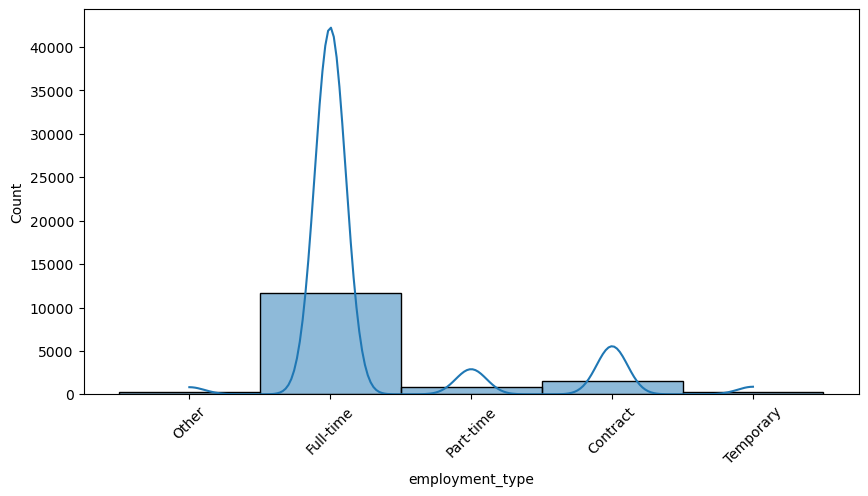

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data['employment_type'],kde= True)
plt.xticks(rotation=45)
plt.show()

In [25]:
data['industry'].value_counts()

industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 131, dtype: int64

In [26]:
data['required_experience'].value_counts()

required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


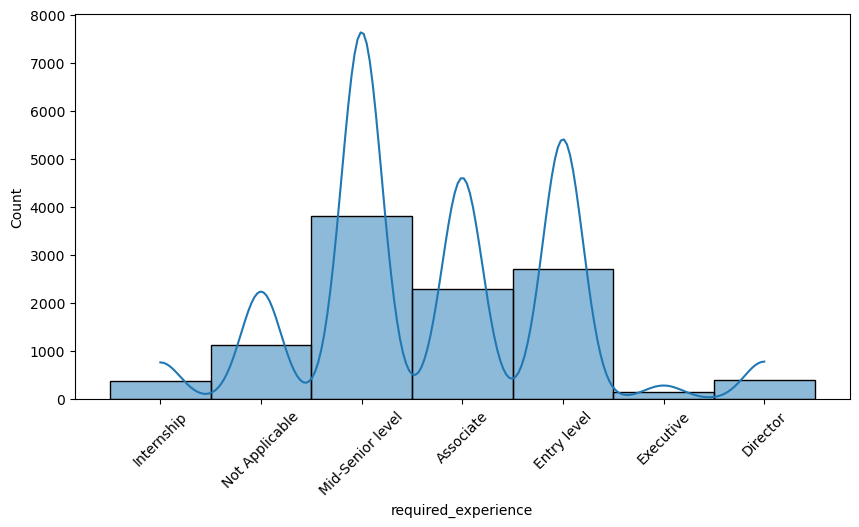

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data['required_experience'],kde= True)
plt.xticks(rotation=45)
plt.show()

In [28]:
data['required_education'].value_counts()

required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


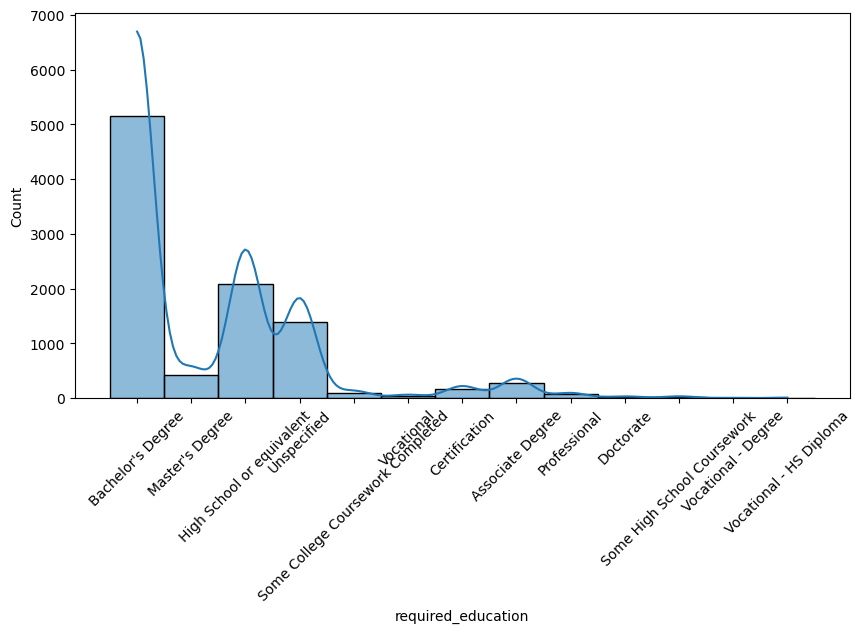

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data['required_education'],kde= True)
plt.xticks(rotation=45)
plt.show()

In [30]:
data['function'].value_counts()

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

In [31]:
data['salary_range'].fillna('unknown',inplace=True)

In [32]:
real_salary_range = data[data['fraudulent'] == 0]['salary_range']
fake_salary_range = data[data['fraudulent'] == 1]['salary_range']


In [33]:
real_salary_range

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
17875    unknown
17876    unknown
17877    unknown
17878    unknown
17879    unknown
Name: salary_range, Length: 17014, dtype: object

In [34]:
real_salary_range.value_counts()

salary_range
unknown          14369
0-0                138
40000-50000         65
30000-40000         51
45000-67000         37
                 ...  
15-25                1
300000-325000        1
27500-36000          1
20-22                1
15500-16500          1
Name: count, Length: 829, dtype: int64

In [35]:
fake_salary_range.value_counts()

salary_range
unknown            643
7200-1380000        10
30000-50000          8
250000-500000        7
28000-32000          6
                  ... 
34000-50000          1
2000-2000            1
6266624-8582080      1
30000-100000         1
0-30000              1
Name: count, Length: 118, dtype: int64

In [36]:
real_salary_range.nunique()

829

In [37]:
fake_salary_range.nunique()

118

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


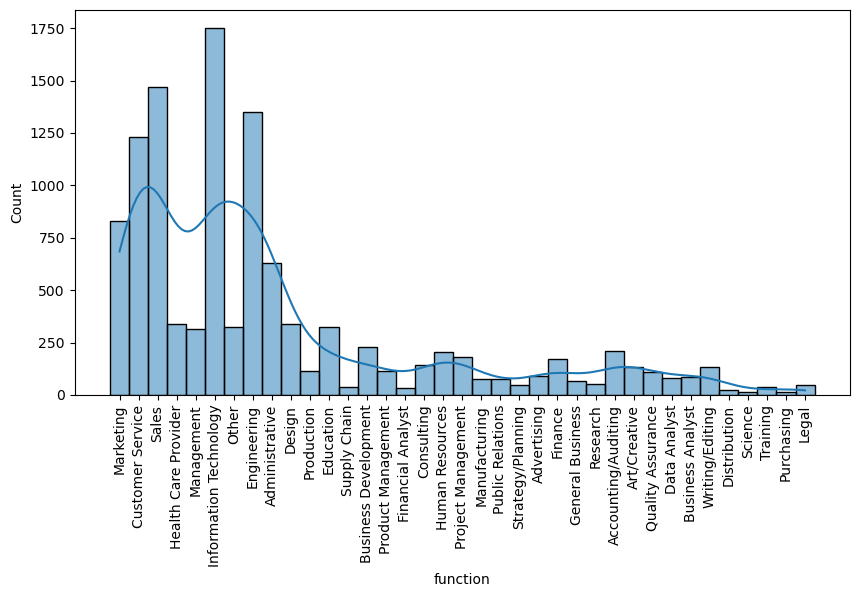

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(data['function'],kde= True)
plt.xticks(rotation=90)
plt.show()

In [39]:
def missing_data(data):
    absolute_missing = data.isnull().sum().sort_values(ascending = False)
    percentage_missing = np.round((data.isnull().sum() / data.shape[0] * 100),2).sort_values(ascending = False)
    missing_dataframe = pd.concat([absolute_missing,percentage_missing],axis = 1,keys = ['Total Count','Percentage'])
    return missing_dataframe[missing_dataframe['Total Count'] > 0]

In [40]:
missing_data(data)

,Total Count,Percentage
department,11547,64.58
required_education,8105,45.33
benefits,7212,40.34
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2696,15.08
location,346,1.94


<Axes: >

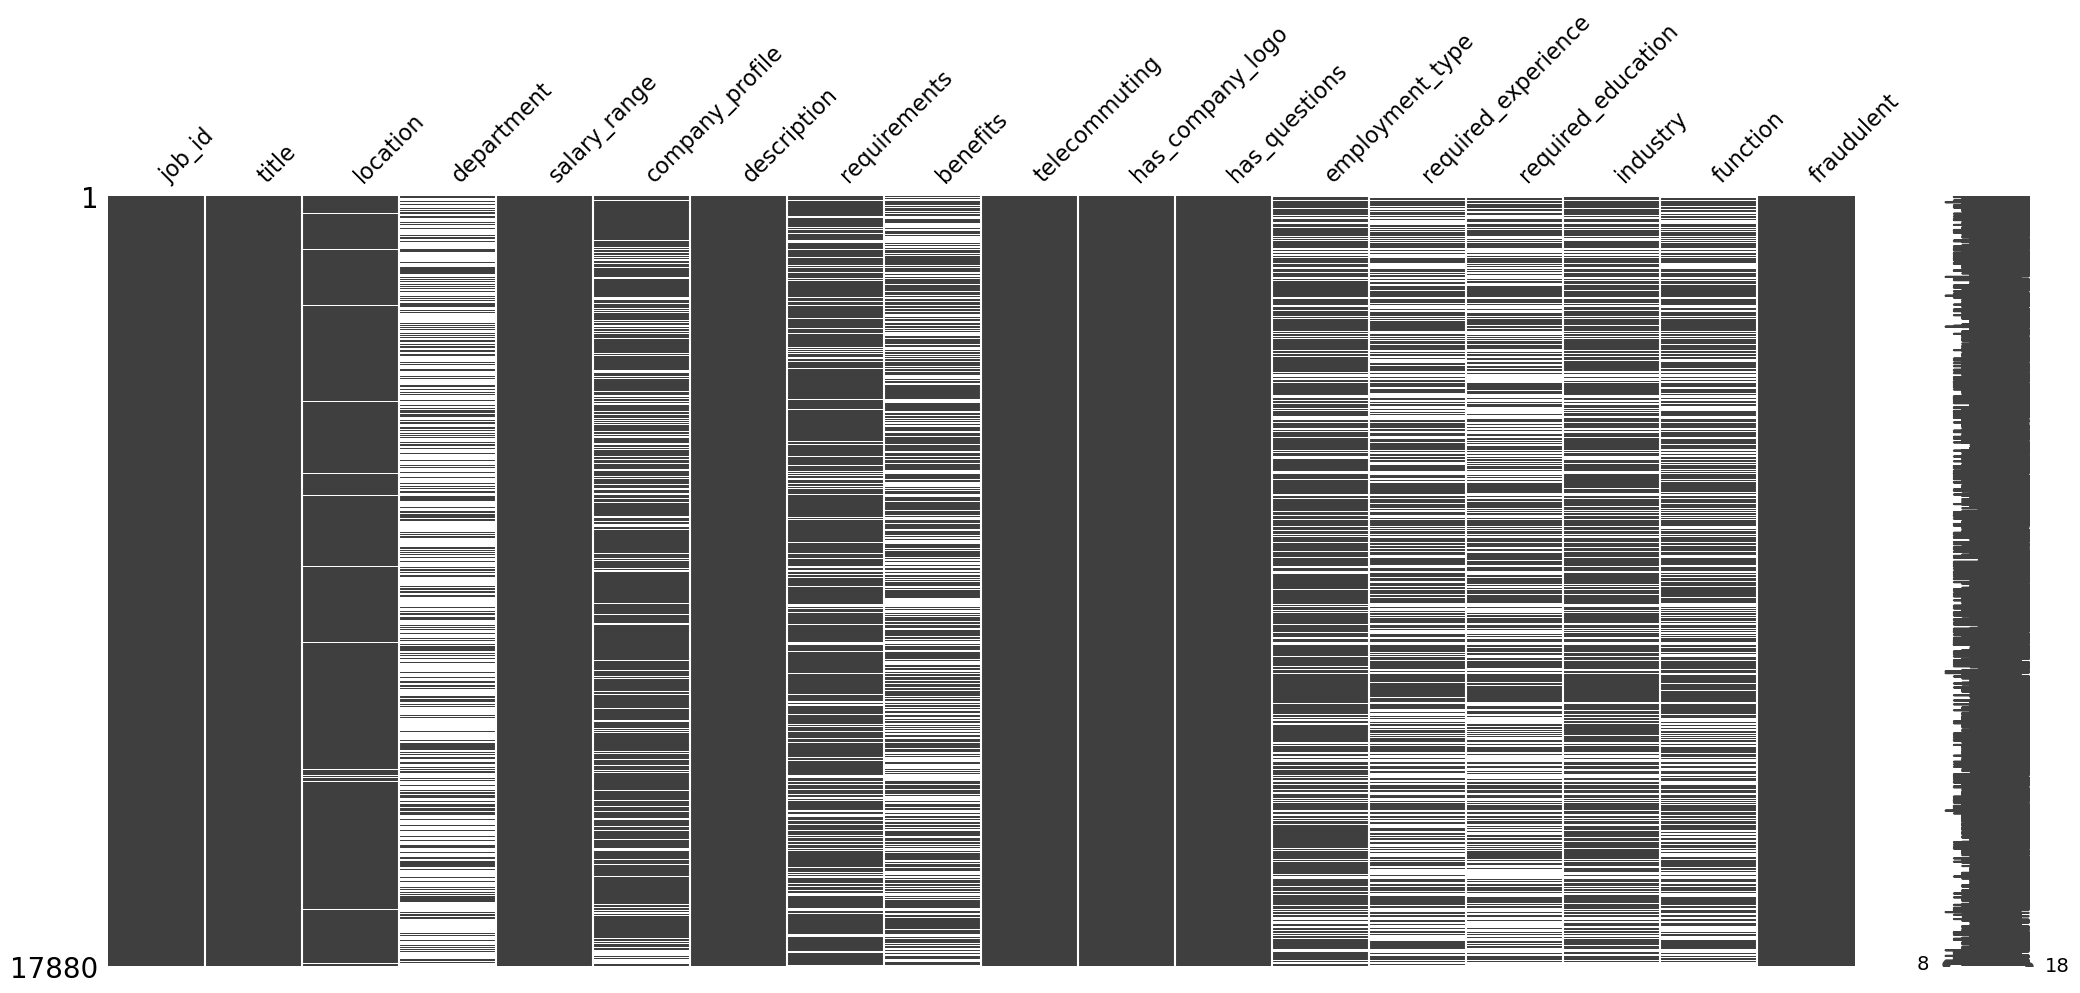

In [41]:
missingno.matrix(data)

In [42]:
data['department'].nunique()

1337

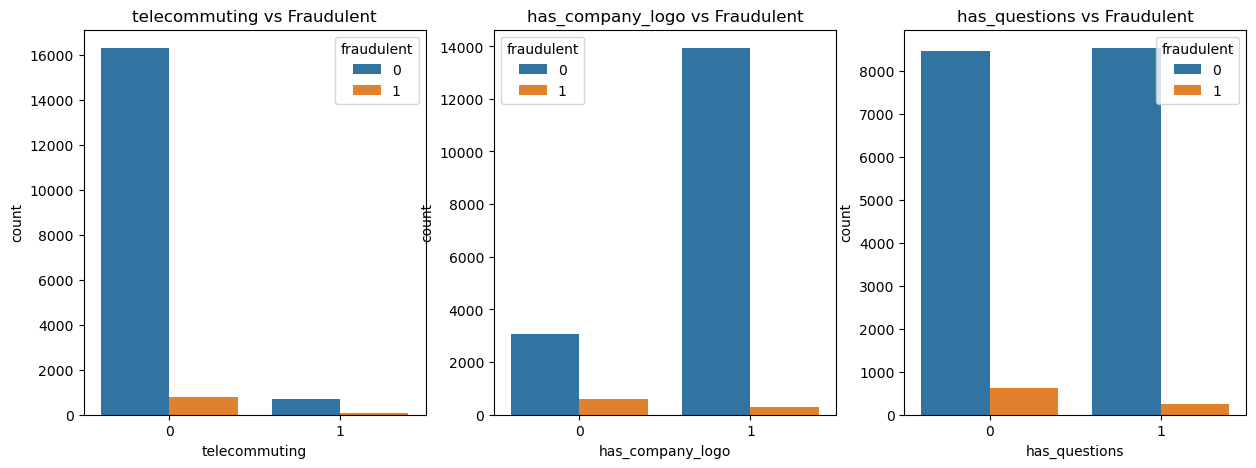

In [43]:
# Convert fraudulent to categorical/string
data['fraudulent'] = data['fraudulent'].astype(str)

variables = ['telecommuting', 'has_company_logo', 'has_questions']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in zip(variables, axs.ravel()):
    sns.countplot(data=data, x=i, hue='fraudulent', ax=ax)
    ax.set_title(f"{i} vs Fraudulent")


<Axes: xlabel='employment_type', ylabel='count'>

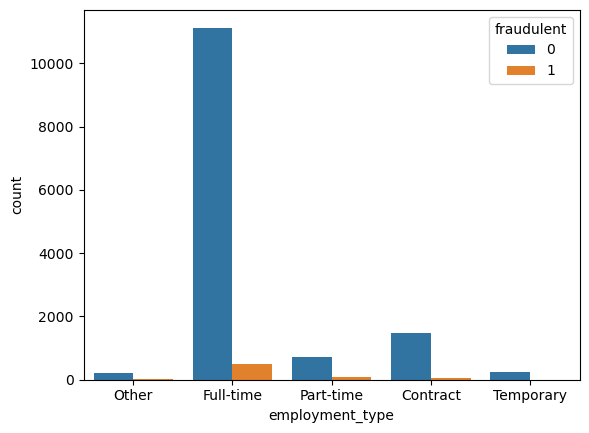

In [44]:
sns.countplot(x=data['employment_type'],hue= data['fraudulent'])

In [45]:
data['employment_type'].fillna('Not Known',inplace = True)

<Axes: xlabel='employment_type', ylabel='count'>

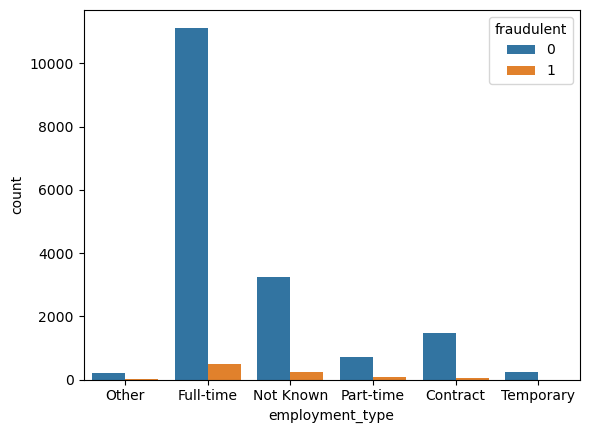

In [46]:
sns.countplot(x=data['employment_type'],hue= data['fraudulent'])

In [47]:
data['required_experience'].fillna('Not Known',inplace = True)

<Axes: xlabel='required_experience', ylabel='count'>

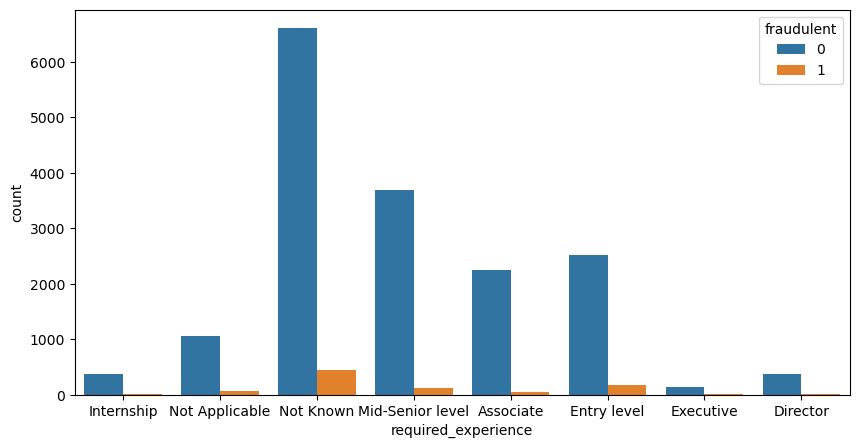

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['required_experience'],hue= data['fraudulent'])

In [49]:
data['required_education'].fillna('Not Known',inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Not Known'),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, "Master's Degree"),
  Text(3, 0, 'High School or equivalent'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'Some College Coursework Completed'),
  Text(6, 0, 'Vocational'),
  Text(7, 0, 'Certification'),
  Text(8, 0, 'Associate Degree'),
  Text(9, 0, 'Professional'),
  Text(10, 0, 'Doctorate'),
  Text(11, 0, 'Some High School Coursework'),
  Text(12, 0, 'Vocational - Degree'),
  Text(13, 0, 'Vocational - HS Diploma')])

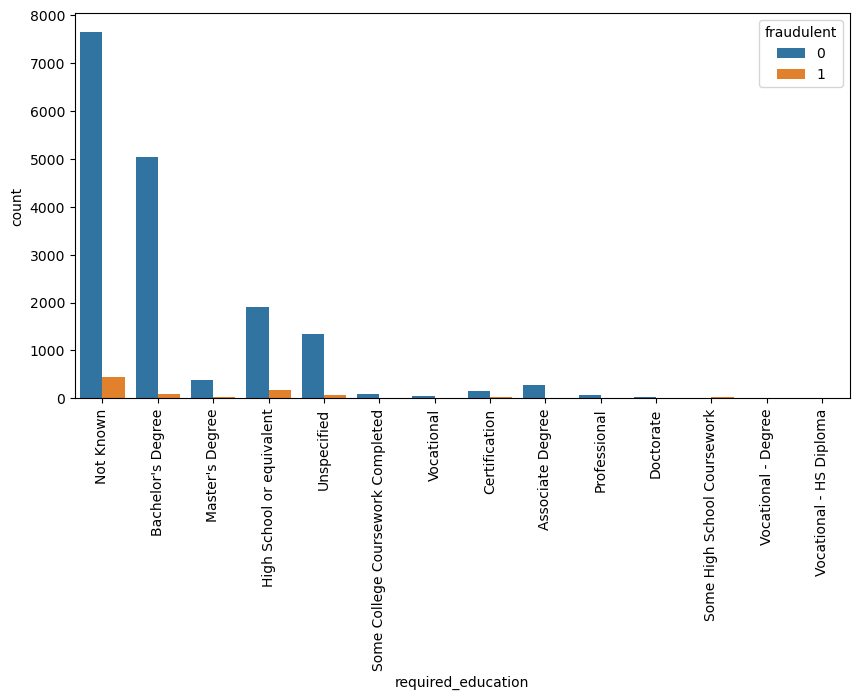

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['required_education'],hue= data['fraudulent'])
plt.xticks(rotation=90)

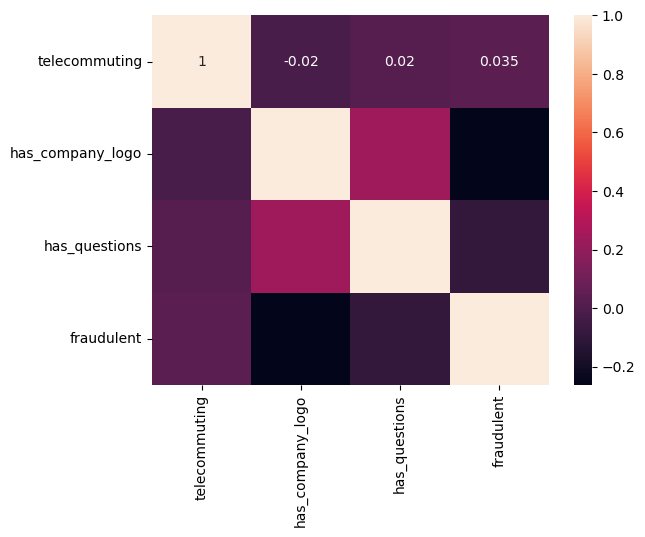

In [51]:
sns.heatmap(data[["telecommuting", "has_company_logo", "has_questions","fraudulent"]].corr(),annot = True);

In [52]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
logo_crosstab = pd.crosstab(data['has_company_logo'],data['fraudulent'])
print(logo_crosstab)
chi2_contingency(logo_crosstab)

fraudulent            0    1
has_company_logo            
0                  3077  583
1                 13937  283


Chi2ContingencyResult(statistic=1224.063728051359, pvalue=3.5943691337772625e-268, dof=1, expected_freq=array([[ 3482.73154362,   177.26845638],
       [13531.26845638,   688.73154362]]))

In [53]:
q_crosstab = pd.crosstab(data['has_questions'],data['fraudulent'])
print(q_crosstab)
chi2_contingency(q_crosstab)

fraudulent        0    1
has_questions           
0              8472  616
1              8542  250


Chi2ContingencyResult(statistic=149.26000303433847, pvalue=2.515984961488263e-34, dof=1, expected_freq=array([[8647.83176734,  440.16823266],
       [8366.16823266,  425.83176734]]))

In [54]:
exp_crosstab = pd.crosstab(data['required_experience'],data['fraudulent'])
print(exp_crosstab)
chi2_contingency(exp_crosstab)

fraudulent              0    1
required_experience           
Associate            2255   42
Director              372   17
Entry level          2518  179
Executive             131   10
Internship            371   10
Mid-Senior level     3696  113
Not Applicable       1056   60
Not Known            6615  435


Chi2ContingencyResult(statistic=126.65990038555026, pvalue=3.1318911349512988e-24, dof=7, expected_freq=array([[2185.74709172,  111.25290828],
       [ 370.15917226,   18.84082774],
       [2566.37348993,  130.62651007],
       [ 134.17080537,    6.82919463],
       [ 362.5466443 ,   18.4533557 ],
       [3624.51487696,  184.48512304],
       [1061.94765101,   54.05234899],
       [6708.54026846,  341.45973154]]))

In [55]:
edu_crosstab = pd.crosstab(data['required_education'],data['fraudulent'])
print(edu_crosstab)
chi2_contingency(edu_crosstab)

fraudulent                            0    1
required_education                          
Associate Degree                    268    6
Bachelor's Degree                  5045  100
Certification                       151   19
Doctorate                            25    1
High School or equivalent          1910  170
Master's Degree                     385   31
Not Known                          7654  451
Professional                         70    4
Some College Coursework Completed    99    3
Some High School Coursework           7   20
Unspecified                        1336   61
Vocational                           49    0
Vocational - Degree                   6    0
Vocational - HS Diploma               9    0


Chi2ContingencyResult(statistic=463.8082706781638, pvalue=7.009207304287559e-91, dof=13, expected_freq=array([[2.60729083e+02, 1.32709172e+01],
       [4.89580705e+03, 2.49192953e+02],
       [1.61766219e+02, 8.23378076e+00],
       [2.47407159e+01, 1.25928412e+00],
       [1.97925727e+03, 1.00742729e+02],
       [3.95851454e+02, 2.01485459e+01],
       [7.71244239e+03, 3.92557606e+02],
       [7.04158837e+01, 3.58411633e+00],
       [9.70597315e+01, 4.94026846e+00],
       [2.56922819e+01, 1.30771812e+00],
       [1.32933770e+03, 6.76623043e+01],
       [4.66267338e+01, 2.37326622e+00],
       [5.70939597e+00, 2.90604027e-01],
       [8.56409396e+00, 4.35906040e-01]]))

In [56]:
emp_crosstab = pd.crosstab(data['employment_type'],data['fraudulent'])
print(emp_crosstab)
chi2_contingency(emp_crosstab)

fraudulent           0    1
employment_type            
Contract          1480   44
Full-time        11130  490
Not Known         3230  241
Other              212   15
Part-time          723   74
Temporary          239    2


Chi2ContingencyResult(statistic=99.82857127990998, pvalue=5.743635664197717e-20, dof=5, expected_freq=array([[1.45018658e+03, 7.38134228e+01],
       [1.10571969e+04, 5.62803132e+02],
       [3.30288557e+03, 1.68114430e+02],
       [2.16005481e+02, 1.09945190e+01],
       [7.58398098e+02, 3.86019016e+01],
       [2.29327405e+02, 1.16725951e+01]]))

In [57]:
tele_crosstab = pd.crosstab(data['telecommuting'],data['fraudulent'])
print(tele_crosstab)
chi2_contingency(tele_crosstab)

fraudulent         0    1
telecommuting            
0              16311  802
1                703   64


Chi2ContingencyResult(statistic=20.52366035210324, pvalue=5.88986891319539e-06, dof=1, expected_freq=array([[16284.14888143,   828.85111857],
       [  729.85111857,    37.14888143]]))

In [58]:
data['location'].value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3105, dtype: int64

In [59]:
data['location'].fillna('Not Known',inplace = True)


In [60]:
data['location'].value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
Not Known                346
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3106, dtype: int64

In [61]:
data['location'] = data['location'].apply(lambda x:x.split(",")[0])

In [62]:
data['location'].value_counts()

location
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
CO        1
SD        1
UG        1
KH        1
Name: count, Length: 91, dtype: int64

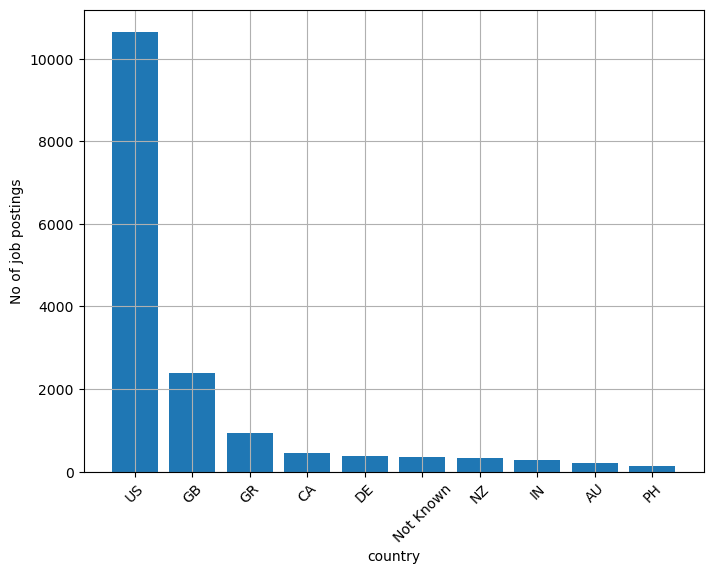

In [63]:
country = dict(data['location'].value_counts()[:10])
plt.figure(figsize=(8,6))
plt.bar(country.keys(),country.values())
plt.xlabel('country')
plt.ylabel('No of job postings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [64]:
missing_data(data)

,Total Count,Percentage
department,11547,64.58
benefits,7212,40.34
function,6455,36.10
industry,4903,27.42
company_profile,3308,18.50
requirements,2696,15.08
description,1,0.01


In [65]:
text_columns = ['title','department','company_profile','description','requirements','benefits','industry','function','location']

In [66]:
for i in text_columns:
    data[i].fillna("",inplace=True)

In [67]:
missing_data(data)

,Total Count,Percentage


<Axes: >

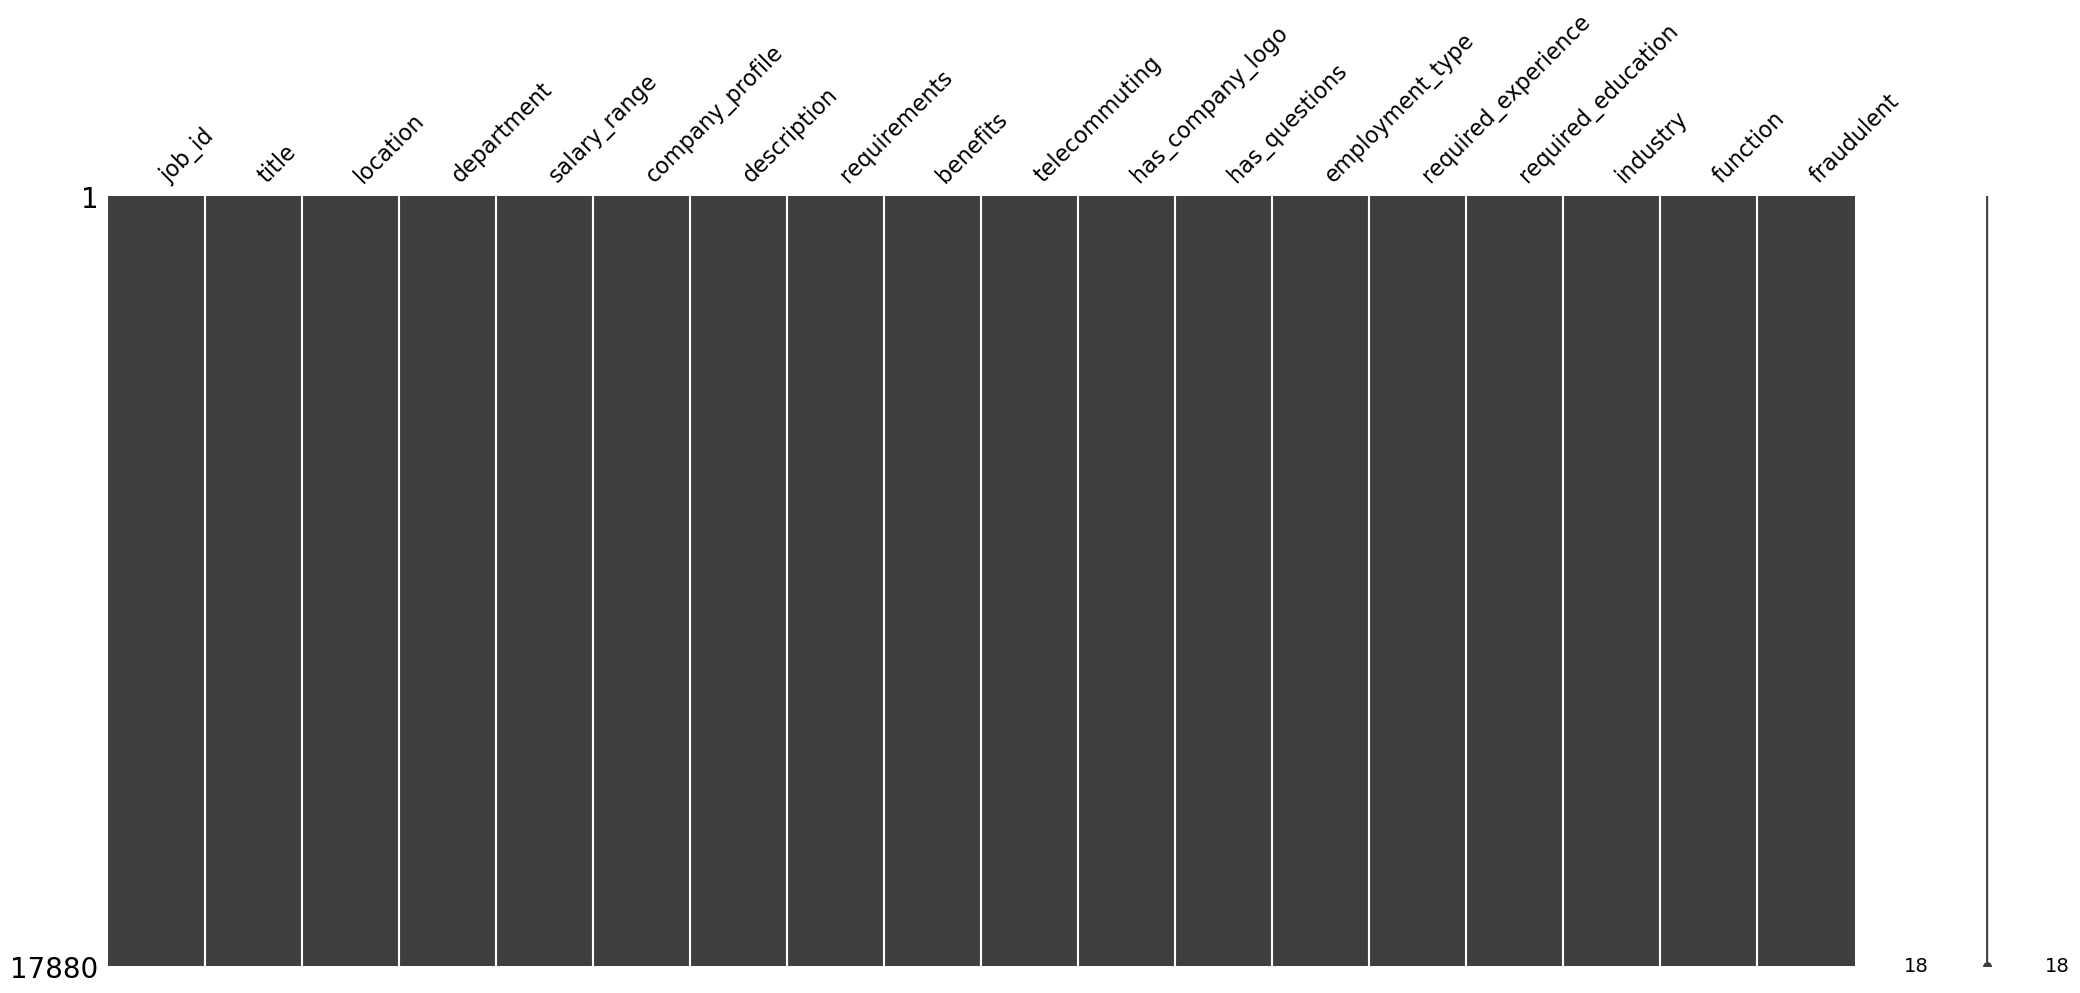

In [68]:
missingno.matrix(data)

In [69]:
data['title']

0                                         Marketing Intern
1                Customer Service - Cloud Video Production
2                  Commissioning Machinery Assistant (CMA)
3                        Account Executive - Washington DC
4                                      Bill Review Manager
                               ...                        
17875                     Account Director - Distribution 
17876                                   Payroll Accountant
17877    Project Cost Control Staff Engineer - Cost Con...
17878                                     Graphic Designer
17879                           Web Application Developers
Name: title, Length: 17880, dtype: object

In [70]:
data['company_profile'][:5]

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
Name: company_profile, dtype: object

In [71]:
data['description'][:5]

0    Food52, a fast-growing, James Beard Award-winn...
1    Organised - Focused - Vibrant - Awesome!Do you...
2    Our client, located in Houston, is actively se...
3    THE COMPANY: ESRI – Environmental Systems Rese...
4    JOB TITLE: Itemization Review ManagerLOCATION:...
Name: description, dtype: object

In [72]:
data['requirements'][:5]

0    Experience with content management systems a m...
1    What we expect from you:Your key responsibilit...
2    Implement pre-commissioning and commissioning ...
3    EDUCATION: Bachelor’s or Master’s in GIS, busi...
4    QUALIFICATIONS:RN license in the State of Texa...
Name: requirements, dtype: object

In [73]:
data['benefits'][:5]

0                                                     
1    What you will get from usThrough being part of...
2                                                     
3    Our culture is anything but corporate—we have ...
4                                Full Benefits Offered
Name: benefits, dtype: object

In [74]:
data['industry'][:5]

0                             
1    Marketing and Advertising
2                             
3            Computer Software
4       Hospital & Health Care
Name: industry, dtype: object

In [75]:
data['function'][:5]

0               Marketing
1        Customer Service
2                        
3                   Sales
4    Health Care Provider
Name: function, dtype: object

In [76]:
data['location'][:5]

0    US
1    NZ
2    US
3    US
4    US
Name: location, dtype: object

In [77]:
data['combined_text']=""

In [78]:
for i in text_columns:
    data['combined_text'] = data['combined_text']+" "+data[i]

In [79]:
data['combined_text'].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [80]:
import nltk
nltk.download('stopwords')
stop_eng = set(stopwords.words("english"))
stop_eng.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
stop_eng

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [82]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]',"",text)
    text = re.sub(r"<.*?>","",text)
    text = re.sub(r"_+","",text)
    text = re.sub(r"\s{2,}","",text)
    text = re.sub(r"\d{1,}","",text)
    text = re.sub(r"\s\w\s","",text)
    return text;

In [83]:
def Correct_URL(text):
    url_pattern = r'\b(?:http?://|www\.)\s+\b'
    corrected_text = re.sub(url_pattern,'CorrectURL',text)
    wrong_url_pattern = r'CorrectURL'
    final_text = re.sub(wrong_url_pattern,'FraudURL',corrected_text)
    return final_text

In [84]:
data['combined_text'] = data['combined_text'].apply(clean_text)
data['combined_text'] = data['combined_text'].apply(Correct_URL)


In [85]:
data['combined_text'].iloc[0]

' marketing intern marketing were food and weve createdgroundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe havetop editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city foodfastgrowing james beard awardwinning online food community and crowdsourced and curated recipe hub is currently interviewi

In [86]:
def  pos_tagger(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemma(text):
    lemmatizer = WordNetLemmatizer()
    tokenized_words = word_tokenize(text)
    lemma_words = [lemmatizer.lemmatize(token) for token in tokenized_words if token not in stop_eng]
    final_text = ' '.join(lemma_words)
    return final_text

In [87]:
data['combined_text'] = data['combined_text'].apply(lemma)

In [88]:
data['combined_text'].iloc[0]

'marketing intern marketing food weve createdgroundbreaking awardwinning cooking site support connect celebrate home cook give everything need one placewe havetop editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today showwere located chelsea new york city foodfastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work insmall team editor executive developer new york city headquartersreproducing andor repackaging existing food content fornumber partner site huffington post yahoo buzzfeed various cont

In [89]:
data['fraudulent'] = data['fraudulent'].astype('int64')



In [90]:
print(data['fraudulent'].unique())

[0 1]


In [91]:
print(data['fraudulent'].dtypes)

int64


In [92]:
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
combined_text          object
dtype: object

In [93]:
real_job_posting = data[data['fraudulent'] == 0]['combined_text'].values
fake_job_posting = data[data['fraudulent'] == 1]['combined_text'].values

In [94]:
real_job_posting[0]


'marketing intern marketing food weve createdgroundbreaking awardwinning cooking site support connect celebrate home cook give everything need one placewe havetop editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today showwere located chelsea new york city foodfastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work insmall team editor executive developer new york city headquartersreproducing andor repackaging existing food content fornumber partner site huffington post yahoo buzzfeed various cont

In [95]:
real_job_str_len = data[data['fraudulent'] == 0]['combined_text'].str.len()
fake_job_str_len = data[data['fraudulent'] == 1]['combined_text'].str.len()

In [96]:
fake_job_str_len

98       4111
144       226
173      5070
180        73
215      4155
         ... 
17827     306
17828     884
17829    1168
17830     649
17831     639
Name: combined_text, Length: 866, dtype: int64

In [97]:
stats.kstest(real_job_str_len,fake_job_str_len)

KstestResult(statistic=0.2774196823645573, pvalue=1.4742093246454726e-56, statistic_location=1522, statistic_sign=-1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='combined_text', ylabel='Count'>

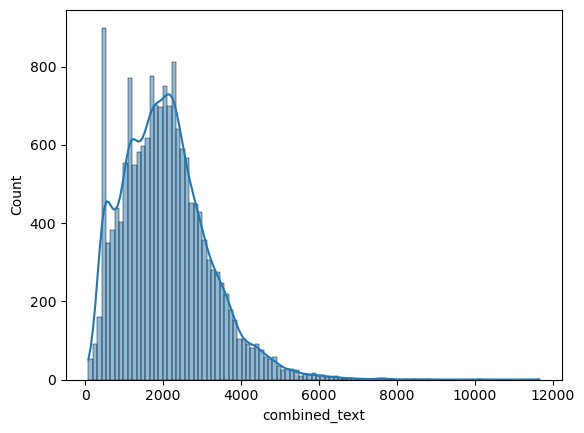

In [98]:
sns.histplot(real_job_str_len,kde=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='combined_text', ylabel='Count'>

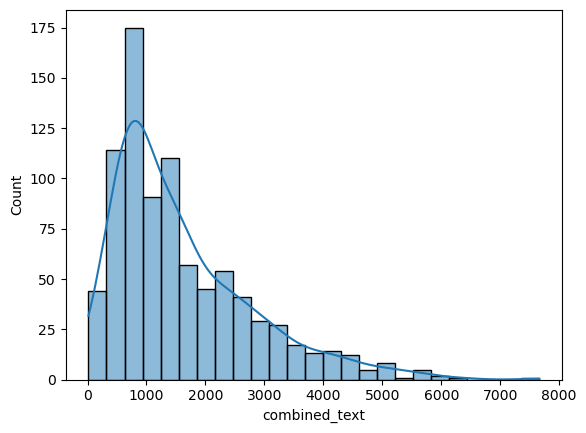

In [99]:
sns.histplot(fake_job_str_len,kde=True)

In [100]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk import ngrams, word_tokenize

def gen_word_cloud(text):
    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=500,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(text)

    # Plot
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [101]:
def generate(text,ngram_size):
    n_grams = ngrams(word_tokenize(text),ngram_size)
    final = [' '.join(val) for val in n_grams]
    return final

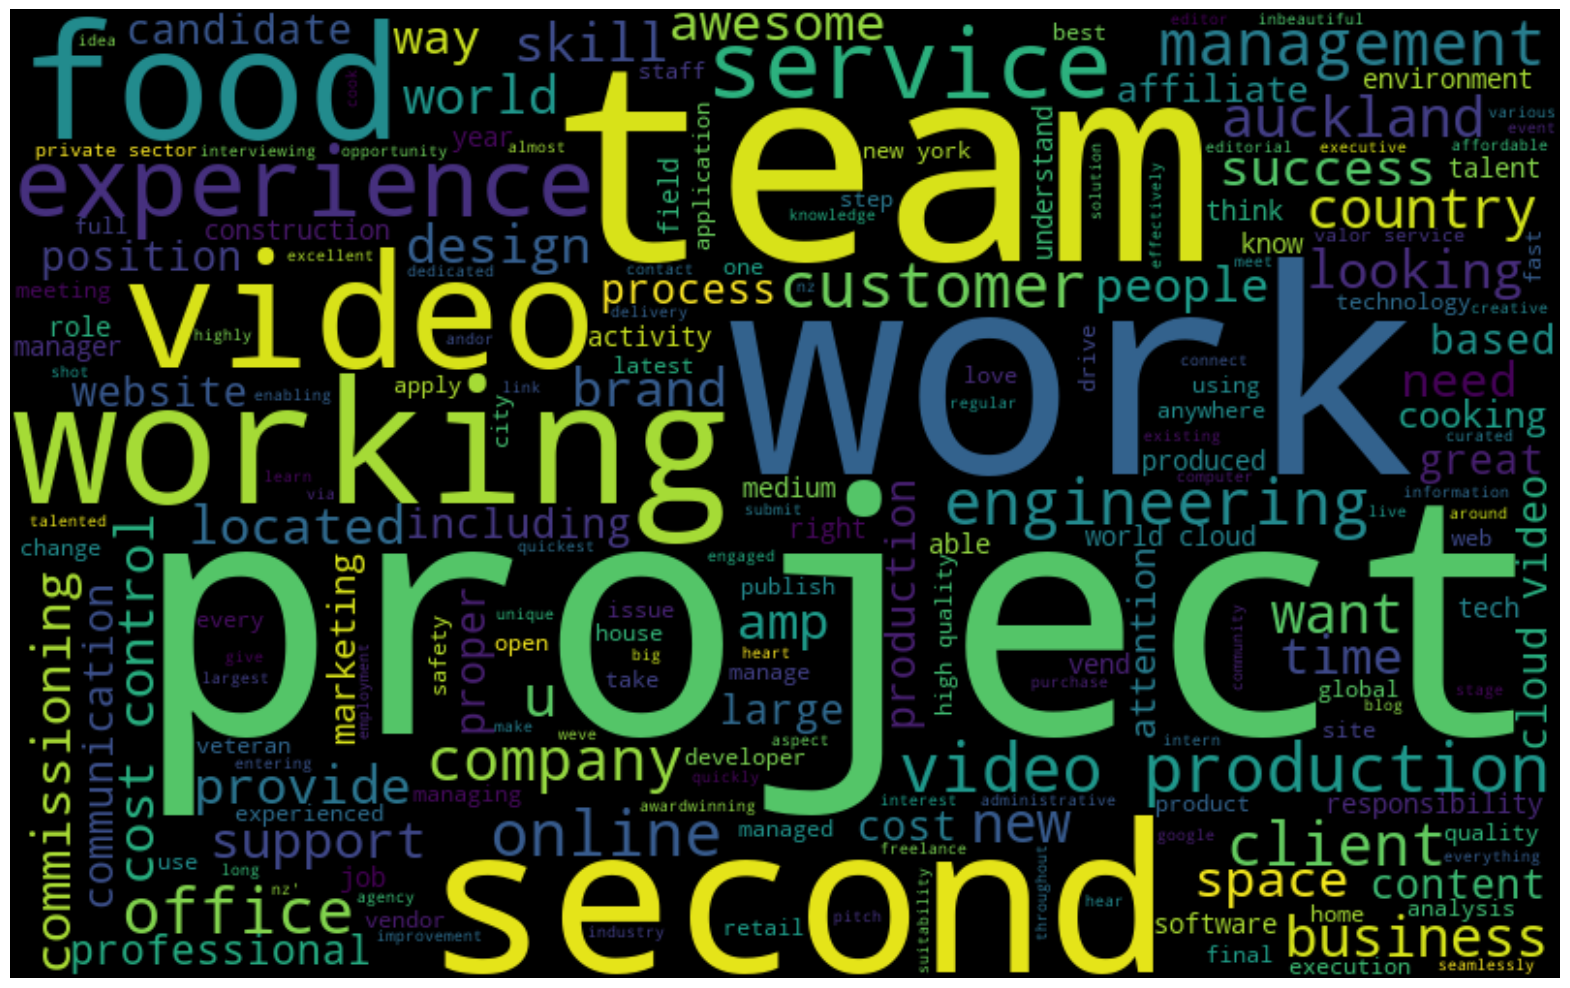

In [102]:
gen_word_cloud(str(real_job_posting))

In [103]:
from collections import defaultdict
realdict_1 = defaultdict(int)
for text in data[data['fraudulent'] == 0]['combined_text'].values:
    for words in generate(text,1):
        realdict_1[words]+=1
real_postings_1 = pd.DataFrame(sorted(realdict_1.items(),key= lambda x : x[1],reverse = True))


<Axes: xlabel='0', ylabel='1'>

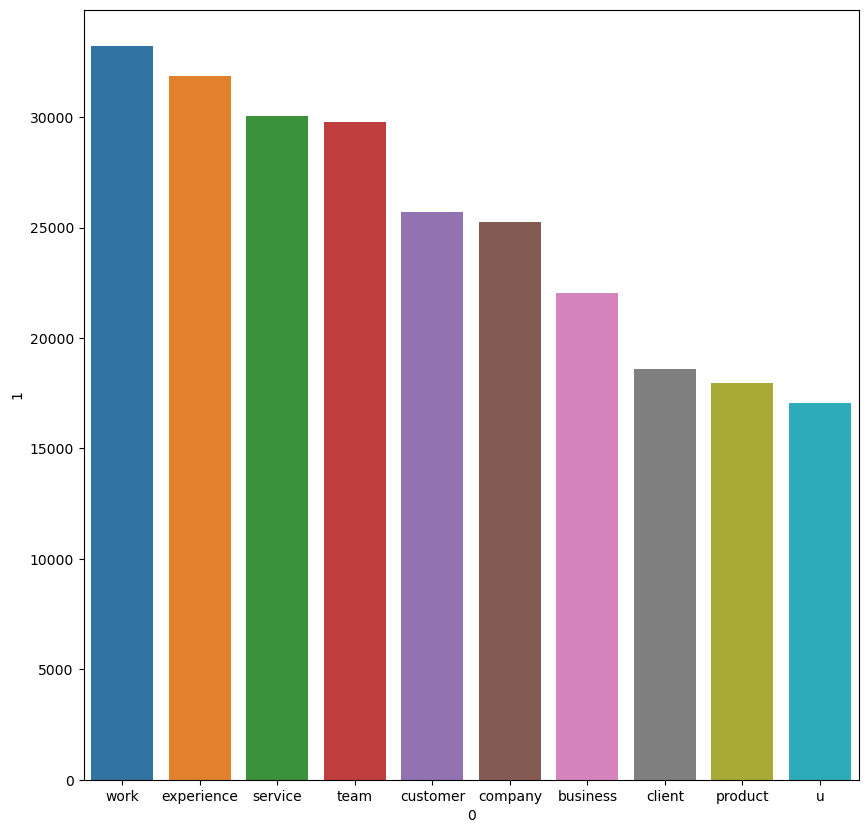

In [104]:
plt.figure(figsize= (10,10))
sns.barplot(x= real_postings_1[0][:10],y= real_postings_1[1][:10])

In [105]:
realdict_2 = defaultdict(int)
for text in data[data['fraudulent'] == 0]['combined_text'].values:
    for words in generate(text,2):
        realdict_2[words] += 1
real_postings_2 = pd.DataFrame(sorted(realdict_2.items(),key = lambda x : x[1],reverse = True))


<Axes: xlabel='0', ylabel='1'>

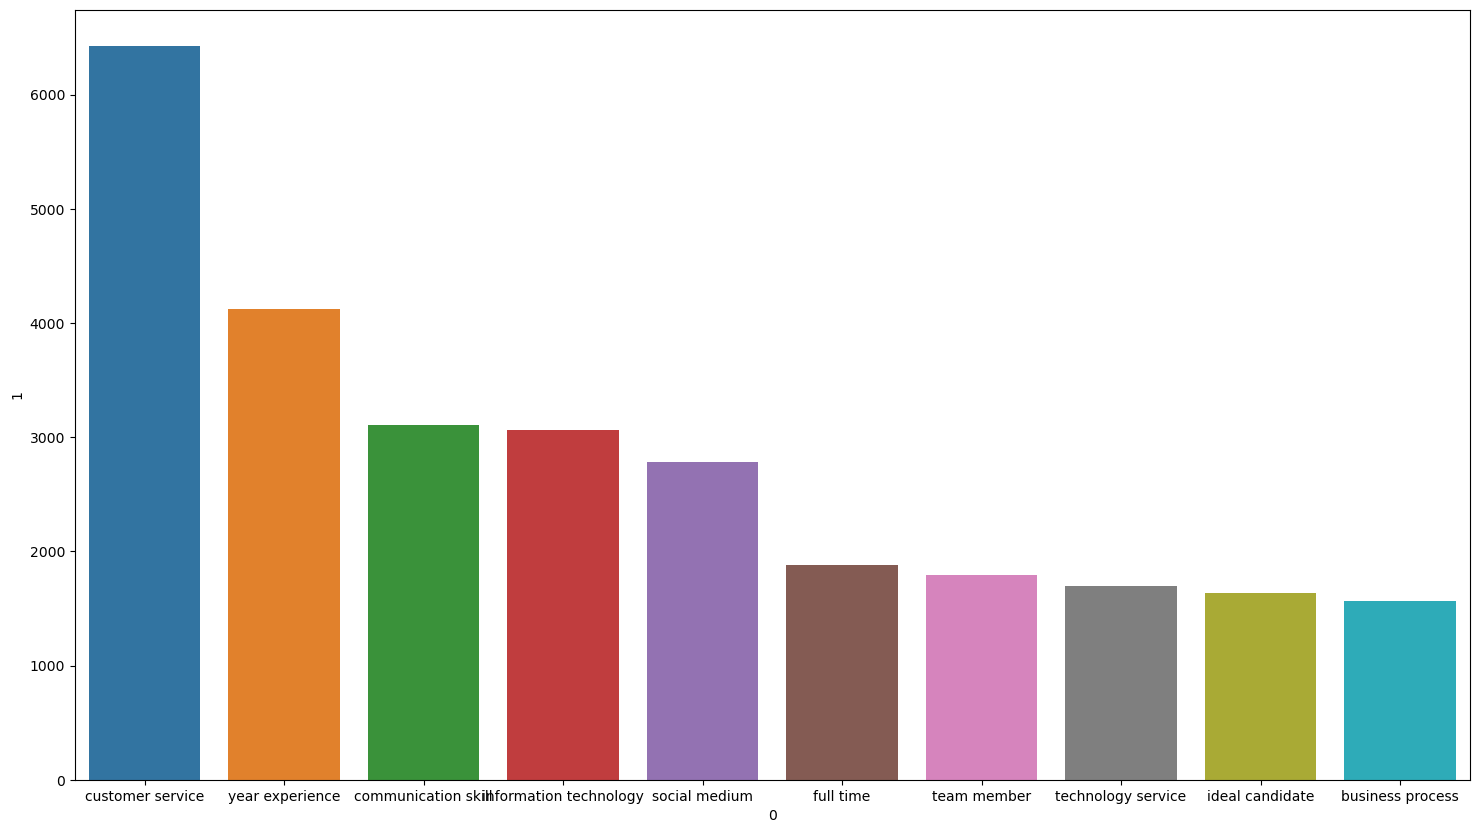

In [106]:
plt.figure(figsize=(18,10))
sns.barplot(x = real_postings_2[0][:10],y= real_postings_2[1][:10])

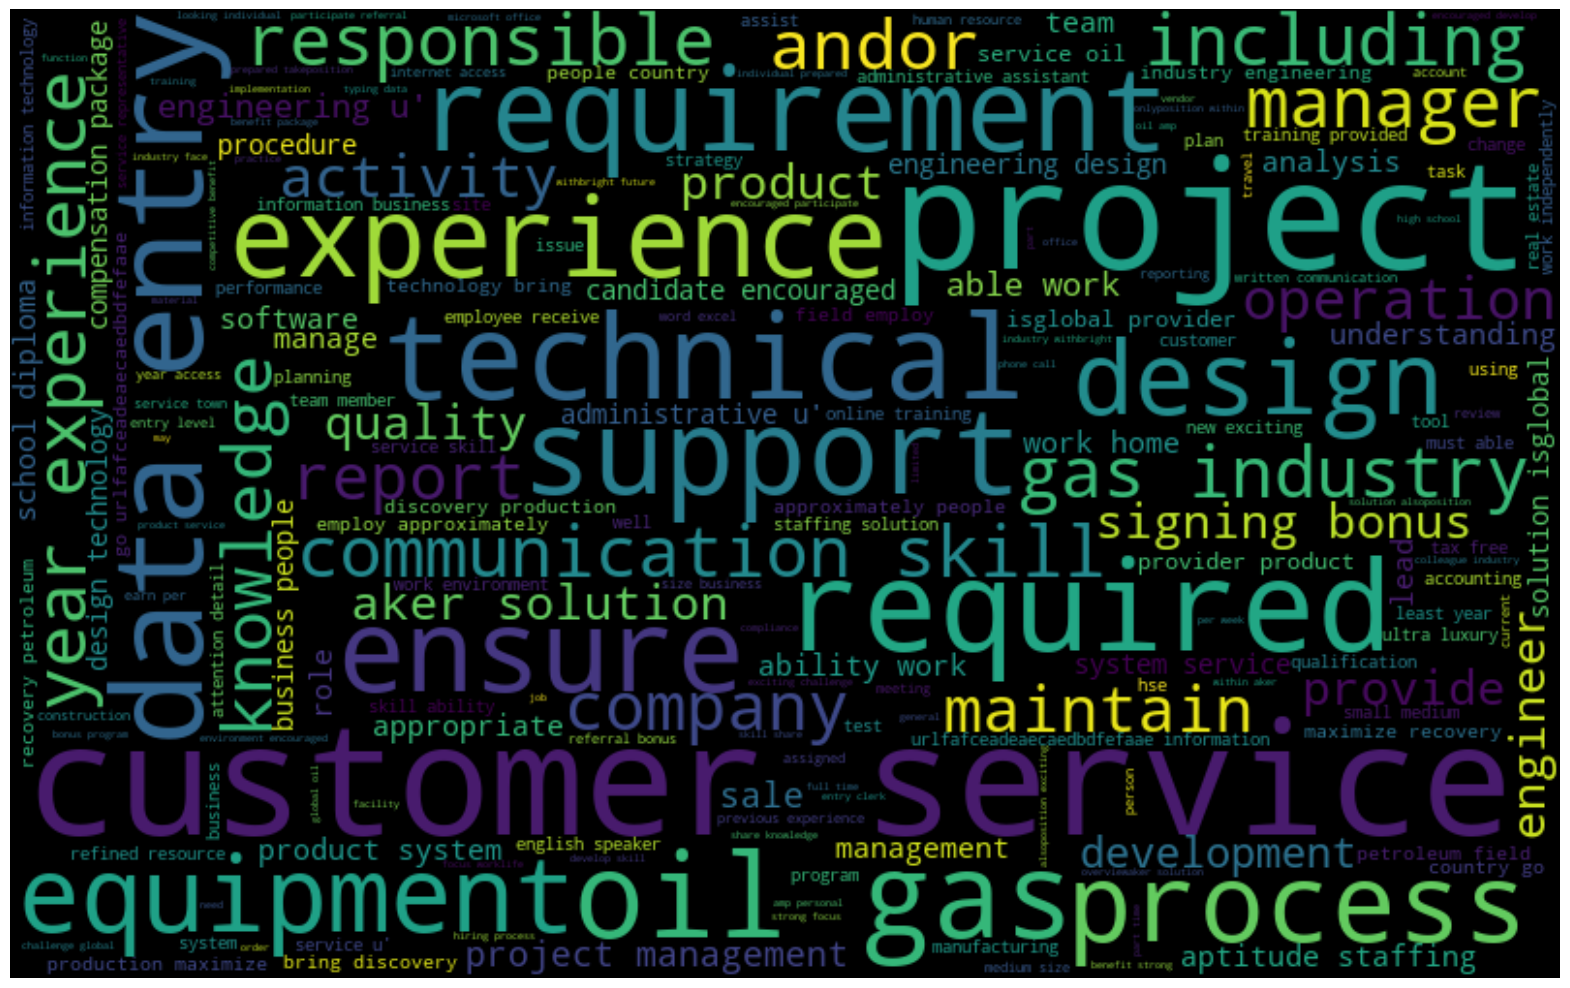

In [107]:
gen_word_cloud(str(fake_job_posting))

In [108]:
fakedict_1 = defaultdict(int)

for text in data[data['fraudulent'] == 1]['combined_text'].values:
    for words in generate(text,1):
        fakedict_1[words] += 1
fake_postings_1 = pd.DataFrame(sorted(fakedict_1.items(),key = lambda x : x[1],reverse = True))

In [109]:
fake_postings_1

,0,1
0,work,1492
1,service,1357
2,experience,1293
3,customer,1066
4,skill,986
...,...,...
15850,asmovermust,1
15851,skillsstart,1
15852,liftflexibile,1
15853,schedulegeat,1


<Axes: xlabel='0', ylabel='1'>

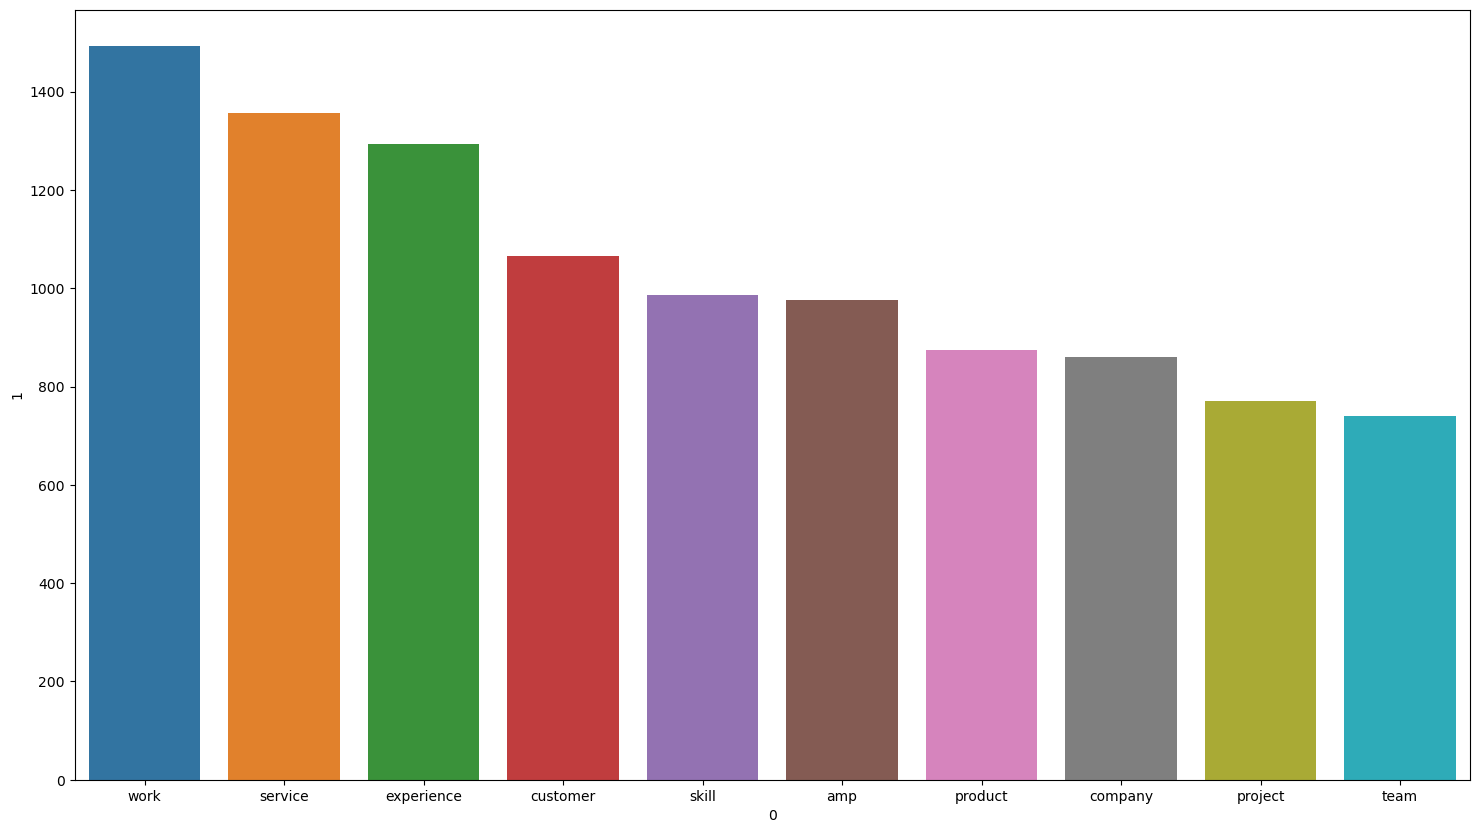

In [110]:
plt.figure(figsize=(18,10))
sns.barplot(x = fake_postings_1[0][:10],y= fake_postings_1[1][:10])

In [111]:
fakedict_2 = defaultdict(int)
for text in data[data['fraudulent'] == 1]['combined_text'].values:
    for words in generate(text,2):
        fakedict_2[words] += 1
fake_postings_2 = pd.DataFrame(sorted(fakedict_2.items(),key = lambda x : x[1],reverse = True))

<Axes: xlabel='0', ylabel='1'>

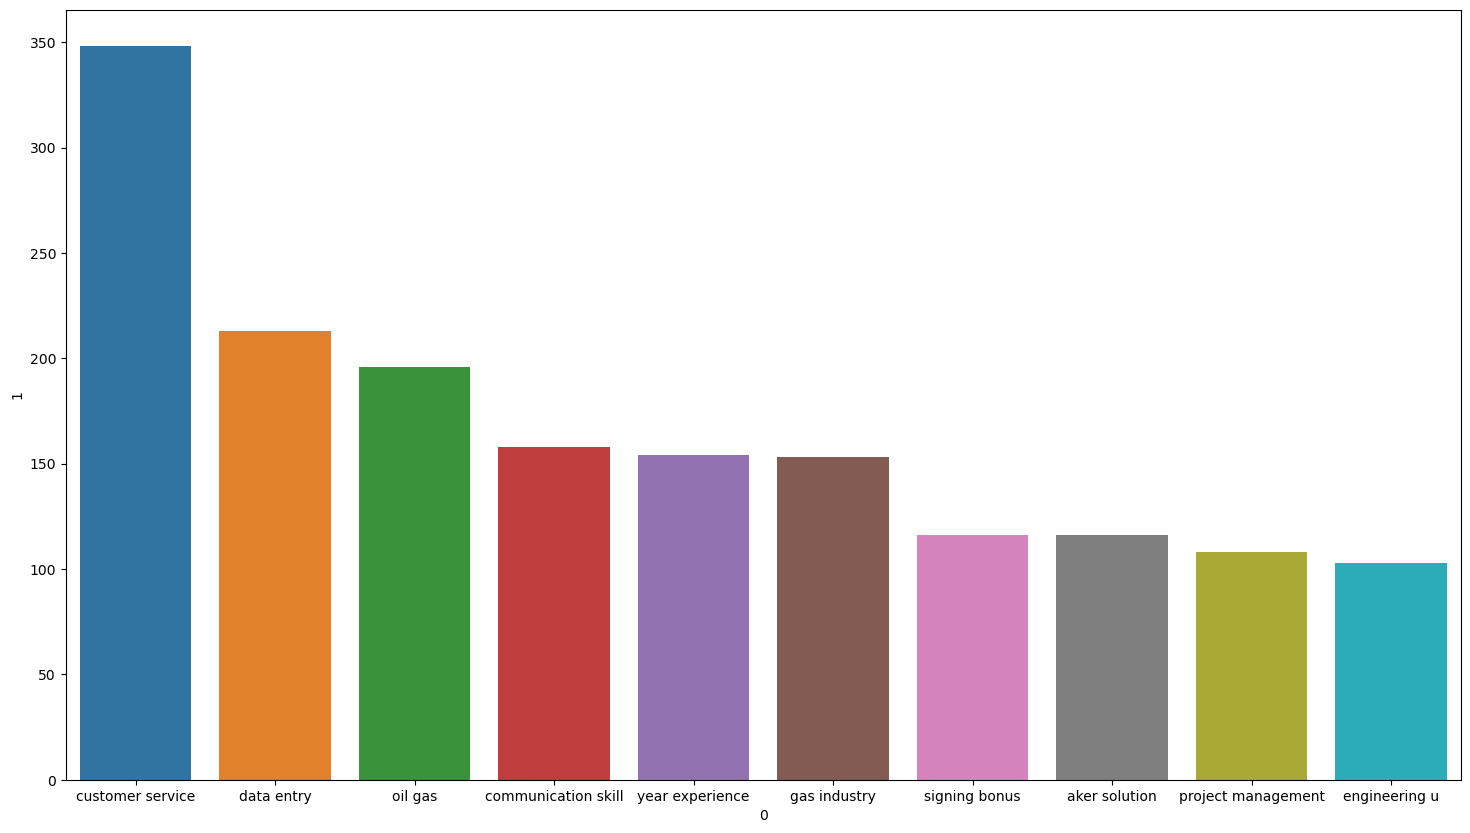

In [112]:
plt.figure(figsize=(18,10))
sns.barplot(x = fake_postings_2[0][:10],y= fake_postings_2[1][:10])

In [113]:
data_dummies = pd.get_dummies(data[['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education']],
                              columns = ['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education'],
                              prefix = ['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education'],drop_first = True).astype(int)

In [114]:
print(data_dtypes := data_dummies.dtypes.head(10))

telecommuting_1                    int32
has_company_logo_1                 int32
has_questions_1                    int32
employment_type_Full-time          int32
employment_type_Not Known          int32
employment_type_Other              int32
employment_type_Part-time          int32
employment_type_Temporary          int32
required_experience_Director       int32
required_experience_Entry level    int32
dtype: object


In [115]:
data_dummies.head(3)

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,required_education_High School or equivalent,required_education_Master's Degree,required_education_Not Known,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [116]:
vectorizer = TfidfVectorizer(lowercase = True,
                             stop_words = 'english',
                             analyzer = 'word',
                             max_features = 3000,
                             ngram_range = (1,2),
                             sublinear_tf = True,
                             smooth_idf = True)
vectorizer.fit(data['combined_text'])
X = vectorizer.transform(data['combined_text'])


In [117]:
X.shape

(17880, 3000)

In [118]:
tfidf_df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())


In [119]:
tfidf_df.head(3)

,ab,ability,ability communicate,ability work,able,able perform,able work,abroad,abroad conversationalwe,abroadplay,...,youll need,youll work,youll working,young,young people,youre,youre looking,youth,youve,zealand
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.034589,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
data_processed = pd.concat([data_dummies,tfidf_df],axis = 1)

In [121]:
data_processed.shape

(17880, 3028)

In [122]:
data.drop(['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits','telecommuting','has_company_logo',
           'has_questions','employment_type','required_experience','required_education','industry','function','combined_text'],axis=1,inplace= True)

In [123]:
data.head()

,fraudulent
0,0
1,0
2,0
3,0
4,0


In [124]:
final_df = pd.concat([data_processed,data],axis = 1)

In [125]:
final_df.shape

(17880, 3029)

In [126]:
y = final_df['fraudulent']

In [127]:
y.shape

(17880,)

In [128]:
x = final_df.drop('fraudulent',axis=1)

In [129]:
x.shape

(17880, 3028)

# Train test split


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state = 42)

In [132]:
print(y.unique(), y.dtypes)


[0 1] int64


# Fix imbalance data

In [133]:
conda install -c conda-forge scikit-learn imbalanced-learn



Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - imbalanced-learn
    - scikit-learn


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.11-2_cp311 
  ucrt               conda-forge/win-64::ucrt-10.0.26100.0-h57928b3_0 
  vc14_runtime       conda-forge/win-64::vc14_runtime-14.44.35208-h818238b_31 
  vcomp14            conda-forge/win-64::vcomp14-14.44.35208-h818238b_31 

The following packages will be UPDATED:

  ca-certificates    pkgs/main/win-64::ca-certificates-202~ --> conda-forge/noarch::ca-certificates-2025.8.3-h4c7d964_0 
  certifi            pkgs/main/win-64::certifi-2024.2.2-py~ --> conda-forge/noarch::certifi-2025.8.3-pyhd8ed1ab_0 
  imbalanced-learn   pkgs/main/win-64::imbalan


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [134]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Before oversampling:", y_train.value_counts())
print("After oversampling:", y_train_res.value_counts())


Before oversampling: fraudulent
0    13619
1      685
Name: count, dtype: int64
After oversampling: fraudulent
0    13619
1    13619
Name: count, dtype: int64


# LogisticRegression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=500, solver='liblinear')
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3395
           1       0.60      0.88      0.71       181

    accuracy                           0.96      3576
   macro avg       0.79      0.92      0.85      3576
weighted avg       0.97      0.96      0.97      3576



# RandomForestClassifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',  # handles any imbalance
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train_res, y_train_res)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.94      0.66      0.78       181

    accuracy                           0.98      3576
   macro avg       0.96      0.83      0.88      3576
weighted avg       0.98      0.98      0.98      3576



# xgboost

In [137]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


C:\Users\kirsh\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:49:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3395
           1       0.79      0.77      0.78       181

    accuracy                           0.98      3576
   macro avg       0.89      0.88      0.89      3576
weighted avg       0.98      0.98      0.98      3576



# GrdSearchCV

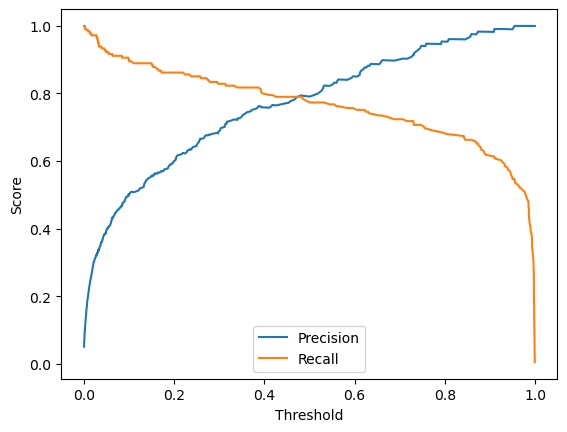

ROC-AUC: 0.982655676612503


In [141]:
from sklearn.metrics import precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


In [142]:
from sklearn.metrics import f1_score

f1_scores = []
for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best threshold:", best_threshold)
print("Best F1 score:", f1_scores[best_idx])


Best threshold: 0.6223893
Best F1 score: 0.8095238095238095


In [192]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
best_threshold = 0.6223893
y_pred_best = (y_pred_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3395
           1       0.88      0.75      0.81       181

    accuracy                           0.98      3576
   macro avg       0.93      0.87      0.90      3576
weighted avg       0.98      0.98      0.98      3576



In [169]:
X_train_res.shape

(27238, 3028)

In [171]:
X_test.shape

(3576, 3028)

In [160]:
col = pd.DataFrame([X_train.columns])
col

,0,1,2,3,4,5,6,7,8,9,...,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027
0,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,youll need,youll work,youll working,young,young people,youre,youre looking,youth,youve,zealand


In [147]:
X_test.shape

(3576, 3028)

In [177]:
predict = xgb_clf.predict(X_test)

In [178]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [180]:
import numpy as np
unique, counts = np.unique(predict, return_counts=True)
print(dict(zip(unique, counts)))


{0: 3399, 1: 177}


In [183]:
from sklearn.metrics import accuracy_score

In [184]:
X_train_pred = xgb_clf.predict(X_train_res)
training_data_accuracy = accuracy_score(X_train_pred,y_train_res)

print("training accuracy score:",training_data_accuracy)

training accuracy score: 0.9993758719436082


In [185]:
X_test_pred = xgb_clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,y_test)

print("test accuracy score:",test_data_accuracy)

test accuracy score: 0.9781879194630873


# Deploy

In [164]:
import pickle

In [199]:

import joblib
import os

save_path = r"C:\Users\kirsh\OneDrive\Desktop\sql and python\Deploy"
os.makedirs(save_path, exist_ok=True)

joblib.dump(vectorizer, os.path.join(save_path, "tfidf_vectorizer.pkl"))
joblib.dump(data_dummies.columns, os.path.join(save_path, "ohe_columns.pkl"))
joblib.dump(xgb_clf, os.path.join(save_path, "xgb_fake_jobs_model.pkl"))
joblib.dump(best_threshold, os.path.join(save_path, "best_threshold.pkl"))


['C:\\Users\\kirsh\\OneDrive\\Desktop\\sql and python\\Deploy\\best_threshold.pkl']

In [ ]:
#filename = 'trained_model.sav'
#pickle.dump(xgb_clf,open(filename,'wb'))

In [ ]:
#loaded_model = pickle.load(open('trained_model.sav','rb'))

In [194]:
import pandas as pd
import joblib

# Load objects
model = joblib.load("xgb_fake_jobs_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
ohe_columns = joblib.load("ohe_columns.pkl")
threshold = joblib.load("best_threshold.pkl")

# Example new job posting
new_post = {
    "telecommuting": 0,
    "has_company_logo": 1,
    "has_questions": 0,
    "employment_type": "Full-time",
    "required_experience": "Entry level",
    "required_education": "Bachelor's Degree",
    "combined_text": "We are hiring a data scientist with experience in Python and ML."
}
new_df = pd.DataFrame([new_post])

# --- Step 1: OneHotEncode ---
new_dummies = pd.get_dummies(
    new_df[['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education']],
    columns=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education'],
    drop_first=True
).astype(int)

# Align with training columns
new_dummies = new_dummies.reindex(columns=ohe_columns, fill_value=0)

# --- Step 2: TF-IDF ---
tfidf_features = vectorizer.transform(new_df['combined_text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer.get_feature_names_out())

# --- Step 3: Combine features ---
new_processed = pd.concat([new_dummies, tfidf_df], axis=1)

# --- Step 4: Predict ---
y_proba = model.predict_proba(new_processed)[:, 1]
y_pred = (y_proba >= threshold).astype(int)

print("Predicted class:", y_pred[0])
print("Fraud probability:", y_proba[0])


Predicted class: 0
Fraud probability: 0.5355448


In [195]:
print(f"Fraud probability: {y_proba[0]:.4f}")
print(f"Predicted class (threshold {threshold}): {y_pred[0]}")
print(f"Predicted class (default 0.5): {int(y_proba[0] >= 0.5)}")


Fraud probability: 0.5355
Predicted class (threshold 0.6223893): 0
Predicted class (default 0.5): 1
